In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sovitrath/diabetic-retinopathy-224x224-2019-data")

print("Path to dataset files:", path)


c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 238M/238M [00:55<00:00, 4.54MB/s] 

Extracting files...


Path to dataset files: C:\Users\Sameer Ahmad\.cache\kagglehub\datasets\sovitrath\diabetic-retinopathy-224x224-2019-data\versions\4


In [1]:
path = r"C:\Users\Sameer Ahmad\Desktop\DARD New Datasets 2\datasets"

print("Path to dataset files:", path)


Path to dataset files: C:\Users\Sameer Ahmad\Desktop\DARD New Datasets 2\datasets


In [2]:
import os

print("Dataset contents:", os.listdir(path))

Dataset contents: ['colored_images']


In [3]:
image_folder = os.path.join(path, "colored_images")

print("Total sub-folder in dataset:", len(os.listdir(image_folder)))

Total sub-folder in dataset: 5


In [4]:
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):  # Check if it's a folder
        print(f"{class_name}: {len(os.listdir(class_path))} images")

0_No_DR: 1805 images
1_Mild: 1181 images
2_Moderate: 999 images
3_Severe: 980 images
4_Proliferate_DR: 929 images


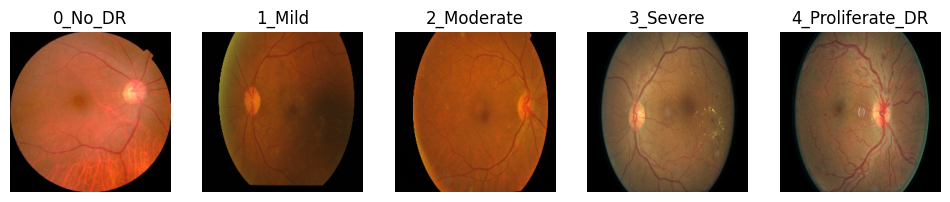

In [5]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Set path to image folder
image_folder = os.path.join(path, "colored_images")

# Define class names
class_labels = ['0_No_DR', '1_Mild', '2_Moderate', '3_Severe', '4_Proliferate_DR']

# Set up the figure
plt.figure(figsize=(12, 6))

# Display one sample image from each class
for i, class_name in enumerate(class_labels):
    class_path = os.path.join(image_folder, class_name)
    image_name = random.choice(os.listdir(class_path))  # Select a random image
    image_path = os.path.join(class_path, image_name)
    
    # Read and display the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.show()


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image size and batch size
IMG_SIZE = (224, 224)  # Resize all images to 224x224
BATCH_SIZE = 32        # Process images in batches

# Define dataset path
image_folder = os.path.join(path, "colored_images")  # Your dataset path

# Use ImageDataGenerator for data preprocessing
#datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)  # Normalize pixels
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly shear the images
    zoom_range=0.2,  # Randomly zoom the images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest',  # How to fill missing pixels after transformation
    validation_split=0.1  # Set validation split
)

# Load training images
train_generator = datagen.flow_from_directory(
    image_folder,  
    target_size=IMG_SIZE,  
    batch_size=BATCH_SIZE,
    class_mode="categorical",  
    subset="training"
)

# Load validation images
val_generator = datagen.flow_from_directory(
    image_folder,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 5307 images belonging to 5 classes.
Found 587 images belonging to 5 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define class labels
class_labels = ["0_No_DR", "1_Mild", "2_Moderate", "3_Severe", "4_Proliferate_DR"]


In [34]:
# Define CNN model
model = Sequential([            #stack
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),      #2D to 1D
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(5, activation='softmax')  # 5 classes (0_No_DR to 4_Proliferate_DR)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        print(f"{class_name}: {len(os.listdir(class_path))} images")


0_No_DR: 1805 images
1_Mild: 1181 images
2_Moderate: 999 images
3_Severe: 980 images
4_Proliferate_DR: 929 images


In [37]:
from sklearn.utils import class_weight
import numpy as np

# Get the class labels
class_names = os.listdir(image_folder)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Create a dictionary mapping class indices to weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Compile the model (make sure this is done before fitting)
model.compile(
    optimizer='adam',  # Use an optimizer, such as Adam
    loss='categorical_crossentropy',  # Use an appropriate loss function
    metrics=['accuracy']  # Define metrics to track during training
)

# Train the model with class weights
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict
)


Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3912 - loss: 1.4290

c:\Users\Sameer Ahmad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.3914 - loss: 1.4287 - val_accuracy: 0.5043 - val_loss: 1.1256
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.4952 - loss: 1.2729 - val_accuracy: 0.5383 - val_loss: 1.0727
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5120 - loss: 1.2110 - val_accuracy: 0.5094 - val_loss: 1.1043
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.5153 - loss: 1.1984 - val_accuracy: 0.5366 - val_loss: 1.0163
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5202 - loss: 1.1736 - val_accuracy: 0.5332 - val_loss: 1.0161
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.5258 - loss: 1.1545 - val_accuracy: 0.5809 - val_loss: 0.9990
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.5357 - loss: 1.1523 - val_accuracy: 0.5571 - val_loss: 1.0003
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.5585 - loss: 1.1399 - val_accuracy: 0.567

KeyboardInterrupt: 

In [65]:
model.save("trained_model.keras")  # Save the previous model before retraining

In [ ]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)




In [38]:
import pickle
# Load history later
with open('history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

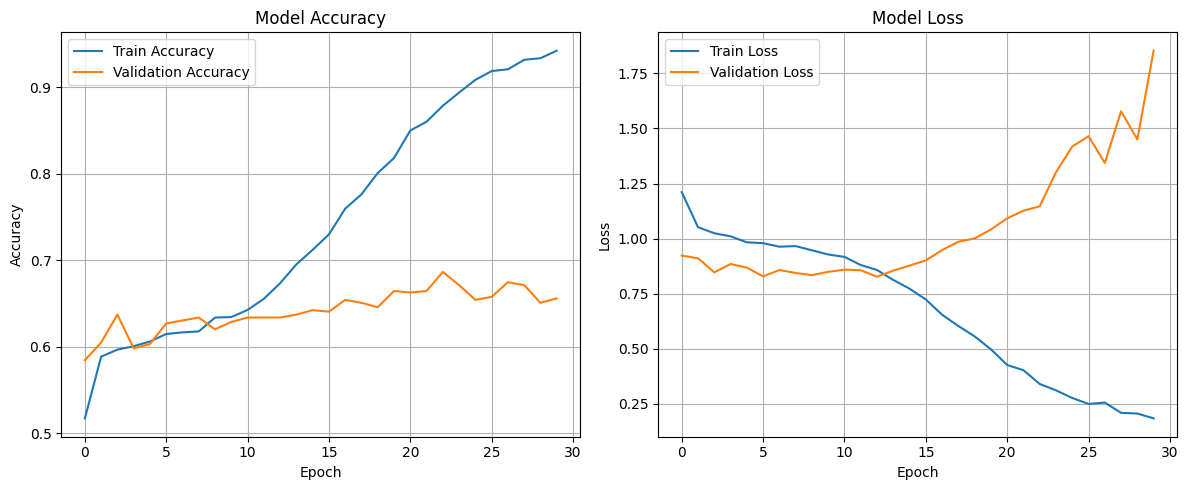

In [39]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Train Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Train Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
# Get training and validation accuracy from history
final_train_acc = loaded_history['accuracy'][-1]
final_val_acc = loaded_history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


Final Training Accuracy: 0.9425
Final Validation Accuracy: 0.6559


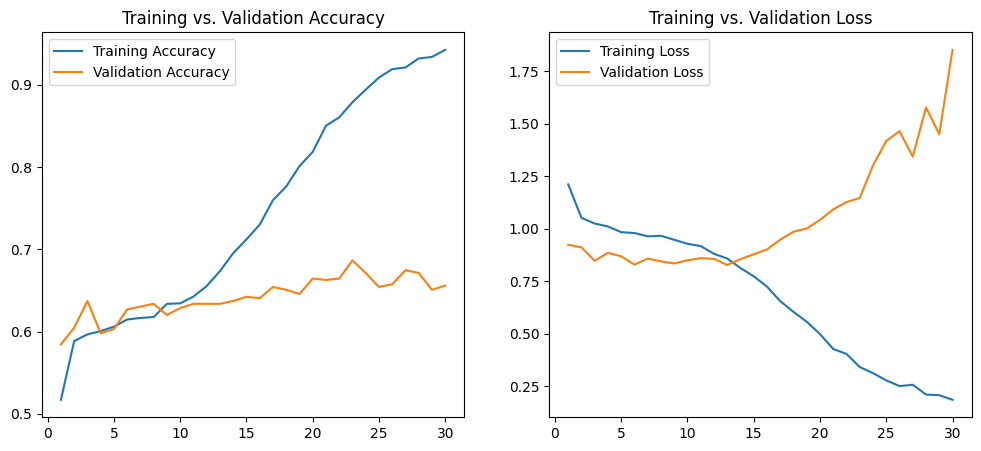

In [14]:
import matplotlib.pyplot as plt
import pickle

# Load the saved history
with open('history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)

# Extract accuracy and loss from loaded history
acc = loaded_history['accuracy']
val_acc = loaded_history['val_accuracy']
loss = loaded_history['loss']
val_loss = loaded_history['val_loss']
epochs_range = range(1, len(acc) + 1)  # Adjust epochs range dynamically

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()


In [15]:
# Print the final accuracy and loss
print("Final Training Accuracy:", loaded_history['accuracy'][-1])
print("Final Validation Accuracy:", loaded_history['val_accuracy'][-1])


Final Training Accuracy: 0.9425287246704102
Final Validation Accuracy: 0.6558773517608643


In [16]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print("Training loss:", loaded_history['loss'][-1])
print(f"Validation loss: {val_loss}")


19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - accuracy: 0.3285 - loss: 1.4812
Training loss: 0.18438602983951569
Validation loss: 1.4730981588363647


In [80]:
import cv2
import numpy as np
from tensorflow import keras

# Constants 
MODEL_PATH = "trained_model.keras"
CLASS_NAMES = ['0_No_DR', '1_Mild', '2_Moderate', '3_Severe', '4_Proliferate_DR']

def preprocess_image(image_path):
    """Replicate training preprocessing steps."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (224, 224))           # Resize to 224x224
    image = image / 255.0                           # Normalize
    return np.expand_dims(image, axis=0)            # Add batch dimension

def predict_retinopathy(image_path):
    """Load model and predict class."""
    model = keras.models.load_model(MODEL_PATH)     # Load model
    processed_image = preprocess_image(image_path)  # Preprocess
    prediction = model.predict(processed_image)     # Predict
    predicted_class = CLASS_NAMES[np.argmax(prediction)]
    confidence = np.max(prediction) * 100           # Confidence score
    return predicted_class, confidence

# Example Usage
if __name__ == "__main__":
    image_path = r"C:\Users\Sameer Ahmad\Desktop\New_Dard\All_Images\All_Combined\1fddd7c98fd2.png"      
    class_name, confidence = predict_retinopathy(image_path)
    print(f"Predicted Class: {class_name} (Confidence: {confidence:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predicted Class: 0_No_DR (Confidence: 100.00%)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = list(val_generator.class_indices.keys())

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step
Classification Report:
                   precision    recall  f1-score   support

         0_No_DR       0.31      0.32      0.32       180
          1_Mild       0.20      0.04      0.07       118
      2_Moderate       0.13      0.21      0.16        99
        3_Severe       0.15      0.14      0.15        98
4_Proliferate_DR       0.14      0.18      0.16        92

        accuracy                           0.20       587
       macro avg       0.19      0.18      0.17       587
    weighted avg       0.21      0.20      0.19       587



Confusion Matrix 1

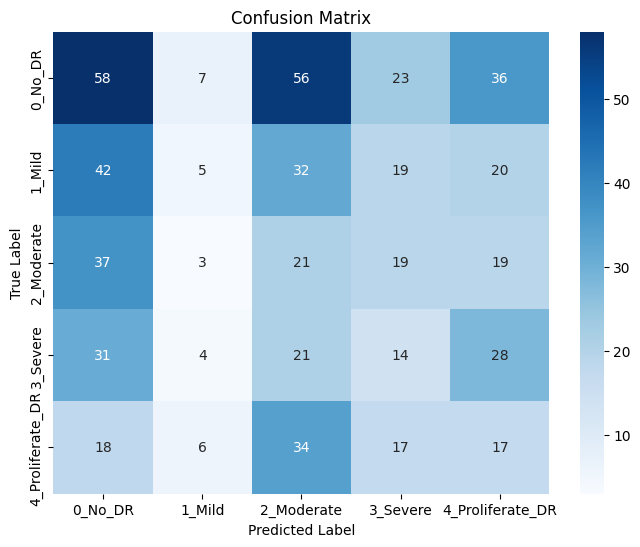

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


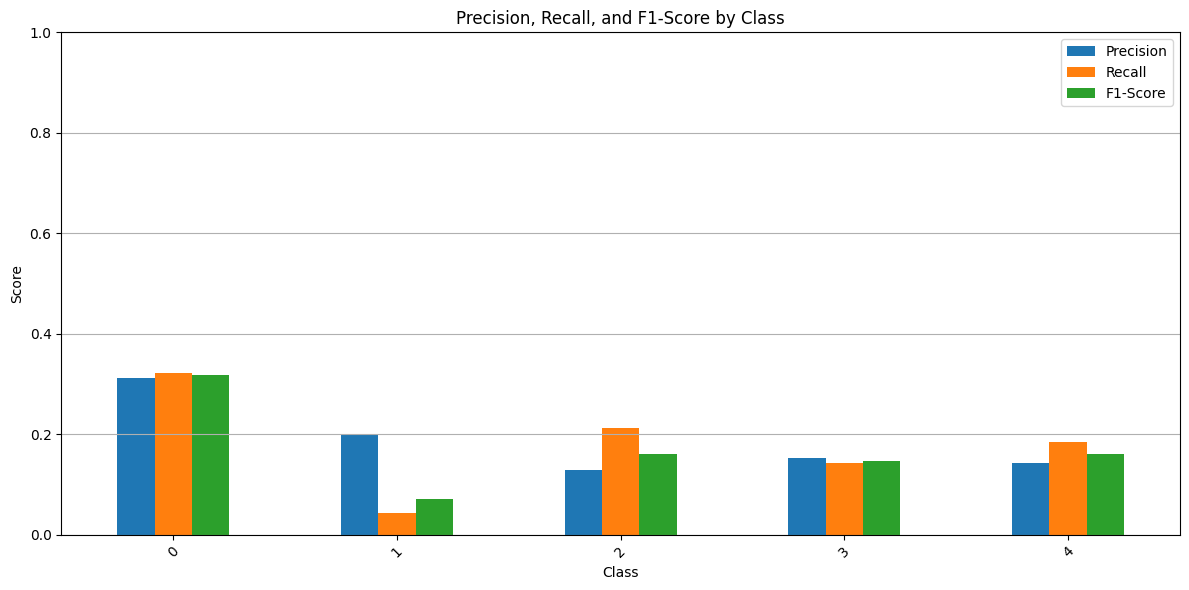

In [42]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None)
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

metrics_df.plot(kind='bar', figsize=(12,6), rot=45)
plt.title("Precision, Recall, and F1-Score by Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


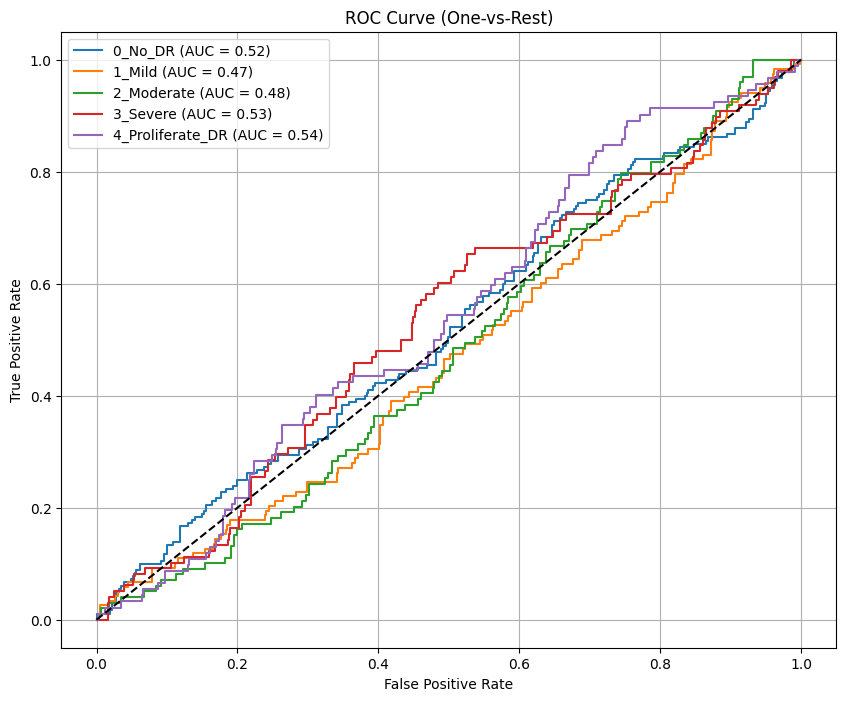

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels
n_classes = len(class_names)
true_binarized = label_binarize(true_labels, classes=range(n_classes))

# ROC Curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(true_binarized[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


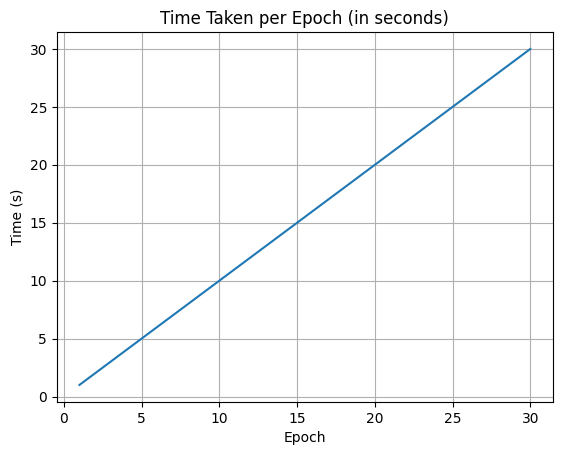

In [44]:
# Example: if you logged time per epoch in a list
epoch_times = [1, 3, 9, 11, 16, 21, 26, 30]  # replace with your actual values
epoch_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]  # replace with your actual values
plt.plot(range(1, len(epoch_times) + 1), epoch_times)
plt.title("Time Taken per Epoch (in seconds)")
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
plt.grid()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step
Classification Report:
                   precision    recall  f1-score   support

         0_No_DR       0.28      0.29      0.29       180
          1_Mild       0.24      0.05      0.08       118
      2_Moderate       0.13      0.22      0.17        99
        3_Severe       0.14      0.12      0.13        98
4_Proliferate_DR       0.15      0.21      0.17        92

        accuracy                           0.19       587
       macro avg       0.19      0.18      0.17       587
    weighted avg       0.20      0.19      0.18       587



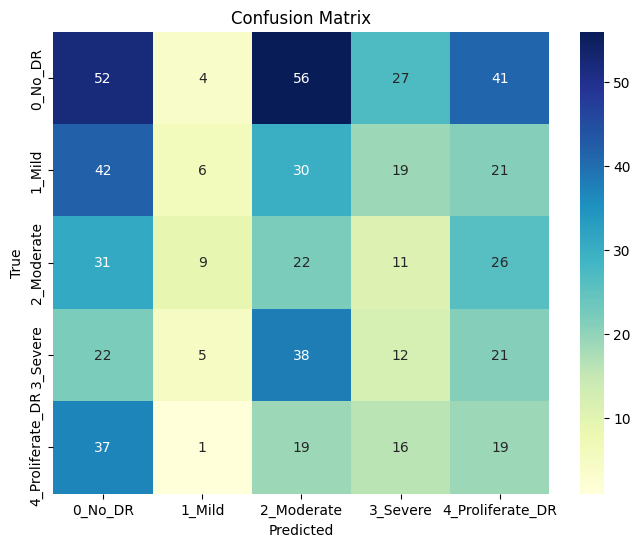

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Classification Report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.6583 - loss: 1.8788
Validation Loss: 1.8529229164123535
Validation Accuracy: 0.6558773517608643
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step
Classification Report:
                   precision    recall  f1-score   support

         0_No_DR       0.29      0.30      0.30       180
          1_Mild       0.25      0.25      0.25       118
      2_Moderate       0.13      0.11      0.12        99
        3_Severe       0.17      0.19      0.18        98
4_Proliferate_DR       0.21      0.18      0.20        92

        accuracy                           0.22       587
       macro avg       0.21      0.21      0.21       587
    weighted avg       0.22      0.22      0.22       587



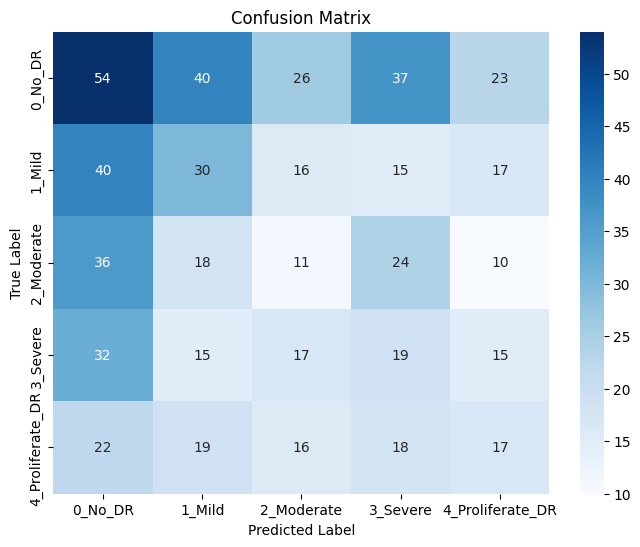

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test dataset
val_loss, val_accuracy = model.evaluate(val_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Get true labels and predictions
true_labels = val_generator.classes
predictions = model.predict(val_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = list(val_generator.class_indices.keys())

# Print Classification Report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))

# Compute and plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
